In [2]:
import plotter

%matplotlib inline
# %matplotlib notebook


import numpy as np
np.random.seed(42)

from utils import Hist1D, MET_LATEX

import matplotlib as mpl


# Histogram objects

The `Hist1D` object wraps a numpy array or a ROOT histogram into a common histogram object, so ROOT histograms can be easily swapped with numpy array histograms. A histogram object is simply a set of bin counts, errors, and edges.

## Creation from numpy arrays
Instantiate a `Hist1D` object with a numpy array and a binning scheme. Then print it. The `__repr__` shows bin counts and errors, which are Poissonian by default. Note that other kwargs to `Hist1D` get passed to a `np.histogram()` call, so you retain the full functionality of numpy. Bin counts, edges, etc. are all stored in numpy arrays, so operations on these are optimized.

In [3]:
h1 = Hist1D(np.random.normal(0,1,300),bins=np.linspace(-3.5,3.5,10))
print h1

<Hist1D:
[ 1.00 ± 1.00    5.00 ± 2.24   32.00 ± 5.66   69.00 ± 8.31
 95.00 ± 9.75   70.00 ± 8.37   20.00 ± 4.47    7.00 ± 2.65
  0.00 ± 0.00]
>


## Creation from ROOT histograms
Take a histogram from ROOT and turn it into a `Hist1D`. Bin contents, edges, and errors are carried over and now you have a nice `Hist1D` object.

In [4]:
import ROOT as r
hroot = r.TH1F("h1","h1",10,0,10)
hroot.FillRandom("gaus")
h1 = Hist1D(hroot)
print h1

<Hist1D:
[ 0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00
  0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00
  0.00 ± 0.00    0.00 ± 0.00]
>


## Math
Now that we've made these histogram objects, what can we do? Math. Errors are propagated with gaussian rules.

In [5]:
h1 = Hist1D(np.random.normal(0,1,300),bins=np.linspace(-3.5,3.5,10))
h2 = Hist1D(np.random.normal(0,1,300),bins=np.linspace(-3.5,3.5,10))
h3 = Hist1D(np.random.normal(0,1,300),bins=np.linspace(-3.5,3.5,10))

print 0.5*(h1+h2-0.2*h2)/h3

<Hist1D:
[ 0.00 ± 0.00    0.85 ± 0.44    0.91 ± 0.23    1.23 ± 0.20
  0.87 ± 0.12    0.76 ± 0.12    0.82 ± 0.19    0.74 ± 0.33
   nan ±  nan]
>


What about asymmetric binomial errors for efficiencies, for example?

In [6]:
hratio = h2.divide(h3,binomial=True)
print hratio.get_errors_up()
print hratio.get_errors_down()

[0.60169107 0.21193764        nan        nan 0.02047241 0.03334018
        nan 0.09209998        nan]
[       nan 0.28202753        nan        nan 0.03270268 0.04608427
        nan 0.21156139        nan]


# Plotting

Now that we have these histogram objects, we can start making plots. Start off with a very simple 3 line example. First, make a couple of Hist1D objects, and use the `label` kwarg to store extra information in the object (which will become a legend label eventually).

Next, just call `plot_stack()` with a list of histograms to stack. Easy.

`plot_stack()` returns the `Figure` object and a list of `Axes` objects.

(<matplotlib.figure.Figure at 0x1140b0e90>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x126121890>])

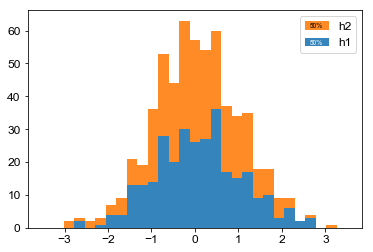

In [7]:
h1 = Hist1D(np.random.normal(0,1,300),label="h1",bins=np.linspace(-3.5,3.5,30))
h2 = Hist1D(np.random.normal(0,1,300),label="h2",bins=np.linspace(-3.5,3.5,30))
plotter.plot_stack([h1,h2])

### Colors and ratios
You can also attach a color to `Hist1D` objects. Any kind of matplotlib-acceptable color works, as you see from the different types below. The `plot_stack` call has more options here for labels. `mpl_hist_params` is a dictionary of kwargs that get passed to the `hist` draw call in matplotlib, so customization is straightforward (and not complicated, because options can be found in the matplotlib documentation).

Additionally, there is a `ratio` option. Using the math capabilities of the `Hist1D` objects, you can specify an arbitrary ratio to show in a panel below the main pad. This pad shows up if you specify data in the `plot_stack` call, or explicitly give a `ratio` parameter.


(<matplotlib.figure.Figure at 0x126113a90>,
  <matplotlib.axes._subplots.AxesSubplot at 0x12634d210>])

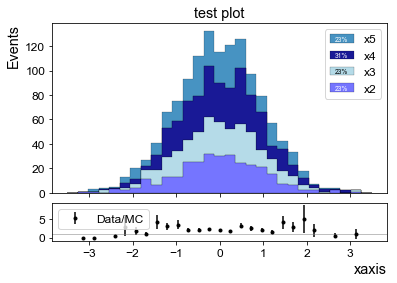

In [8]:
bgs = [
    Hist1D(np.random.normal(0,1,300),label="x2",bins=np.linspace(-3.5,3.5,30),color=(0.4,0.4,1)),
    Hist1D(np.random.normal(0,1,300),label="x3",bins=np.linspace(-3.5,3.5,30),color="lightblue"),
    Hist1D(np.random.normal(0,1,400),label="x4",bins=np.linspace(-3.5,3.5,30),color="darkblue"),
    Hist1D(np.random.normal(0,1,300),label="x5",bins=np.linspace(-3.5,3.5,30),color=mpl.cm.get_cmap('Spectral')(0.9)),
    ]
plotter.plot_stack(
        bgs=bgs,
        title="test plot",
        xlabel="xaxis",
        ylabel="Events",
        mpl_hist_params={"edgecolor":"k","linewidth":0.2},
        ratio=(bgs[1]+bgs[2])/bgs[0],
        )

### More options
Here is an example of two unstacked histograms (one is a subset of the other) with an "efficiency" ratio (with asymmetric errors) below.

(<matplotlib.figure.Figure at 0x1140a3b90>,
  <matplotlib.axes._subplots.AxesSubplot at 0x1264cead0>])

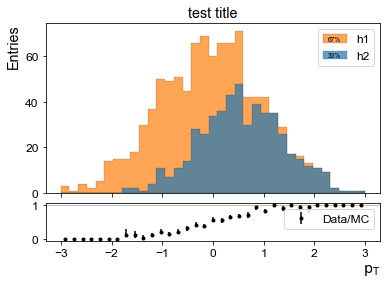

In [9]:
gaus1 = np.random.normal(0,1,1000)
bins = np.linspace(-3,3,36)
gaus2 = gaus1[gaus1 > np.random.normal(0,1,1000)]
h1 = Hist1D(gaus1,bins=bins,label="h1")
h2 = Hist1D(gaus2,bins=bins,label="h2")
hratio = h2.divide(h1,binomial=True)
plotter.plot_stack(
    bgs=[h2,h1],
    title="test title",
    xlabel=r"$\mathrm{p}_\mathrm{T}$",
    ylabel="Entries",
    mpl_hist_params={"edgecolor":"k","linewidth":0.2,"stacked":False,"alpha":0.7},
    ratio=hratio
)

### More bells and whistles

Here's a more "realistic" (but still fake) plot. This time, a signal histogram is included. Note the `mpl_figure_params` dictionary. These are kwargs to the `plt.figure()` call. It's used here to specify the figure size since Jupyter hijacks it and creates small figures, which would cause the legend to overlap with many things.

(<matplotlib.figure.Figure at 0x1261c25d0>,
  <matplotlib.axes._subplots.AxesSubplot at 0x1265ac0d0>])

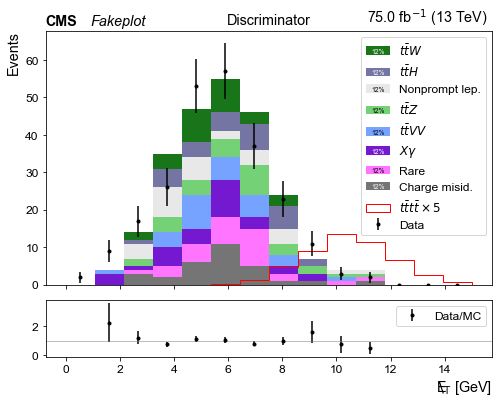

In [10]:
bginfo = [
        ("Charge misid." , [0.4, 0.4, 0.4]),
        ("Rare"          , [1.0, 0.4, 1.0]),
        ("$X\\gamma$"    , [0.4, 0.0, 0.8]),
        ("$t\\bar{t}VV$" , [0.4, 0.6, 1.0]),
        ("$t\\bar{t}Z$"  , [0.4, 0.8, 0.4]),
        ("Nonprompt lep.", [0.9, 0.9, 0.9]),
        ("$t\\bar{t}H$"  , [0.4, 0.4, 0.6]),
        ("$t\\bar{t}W$"  , [0.0, 0.4, 0.0]),
        ]

bgs = []
for label, color in bginfo:
    bg = Hist1D(np.random.normal(5.8,2,30), bins=np.linspace(0,15,15), label=label, color=color)
    bgs.append(bg)

# fake data
data = Hist1D(np.random.normal(5.8,2,240), bins=bgs[0].get_edges(), color="k", label="Data")

# get sig and scale by 5
label_sig = "$t\\bar{t}t\\bar{t} \\times 5$"
sig = Hist1D(np.random.normal(10.5,1.5,500), weights=0.02*np.ones(500), bins=np.linspace(0,15,15), label=label_sig,color="r")
sig *= 5

# labels
title = "Discriminator"
xlabel = "{} [GeV]".format(MET_LATEX)
ylabel = "Events"

plotter.plot_stack(
    bgs=bgs,
    data=data,
    sigs=[sig],
    title=title,
    xlabel=xlabel,
    ylabel=ylabel,
    mpl_figure_params={"figsize":(8,6)},
    cms_type="Fakeplot",
    lumi="75.0",
)

### Plot styles
Various matplotlib styles can be used. Can't guarantee that they all look pretty out of the box, but the plotter works with matplotlib's style contexts. You can also write out the figure to a file via the `filename` argument.

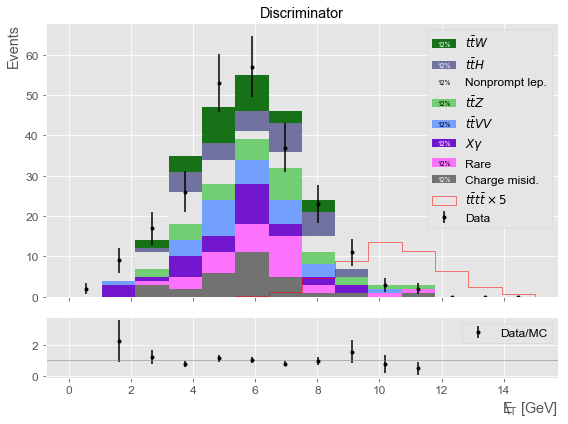

In [11]:
with mpl.pyplot.style.context("ggplot"):
# with mpl.pyplot.style.context('fivethirtyeight'):
    plotter.plot_stack(
        bgs=bgs,
        data=data,
        sigs=[sig],
        title=title,
        xlabel=xlabel,
        ylabel=ylabel,
        mpl_figure_params={"figsize":(8,6)},
        filename="test.png",
    )

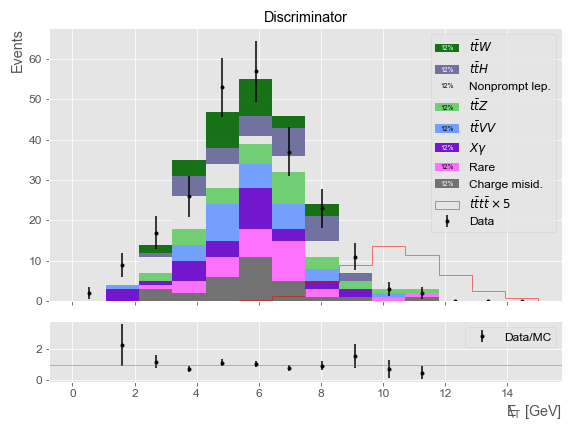

In [12]:
from IPython.display import Image
Image(filename='test.png') 

### 2D histograms
Two dimensional histograms are supported as well, with some nice plotting goodies. Construction of a `Hist2D` parallels `Hist1D`. Thus, ROOT histograms can be passed in to make a `Hist2D` object, or a two-column `numpy` array can be used (for the x and y values). `weights` and mathematical operations are also handled correctly, as for `Hist1D`.

In [13]:
from utils import Hist2D
import numpy as np

N = 200
vals = np.c_[ np.random.normal(0,1.5,N), np.random.uniform(-4.0,4.0,N) ]
bins = [ np.linspace(-5,5,5), np.linspace(-5,5,6) ]

hist = Hist2D(vals,bins=bins)
print hist

<Hist2D:
[[ 0.00 ± 0.00    9.00 ± 3.00   11.00 ± 3.32    1.00 ± 1.00]
 [ 2.00 ± 1.41   28.00 ± 5.29   22.00 ± 4.69    1.00 ± 1.00]
 [ 0.00 ± 0.00   24.00 ± 4.90   17.00 ± 4.12    5.00 ± 2.24]
 [ 2.00 ± 1.41   29.00 ± 5.39   26.00 ± 5.10    1.00 ± 1.00]
 [ 1.00 ± 1.00   12.00 ± 3.46    9.00 ± 3.00    0.00 ± 0.00]]
>


2D histograms can be converted into 1D projections (i.e., sum up bins along x/y) or 1D profiles (get weighted means of slices along x/y).

In [14]:
print hist.get_x_profile()
print hist.get_y_profile()
print hist.get_x_projection()
print hist.get_y_projection()

<Hist1D:
[ 0.80 ± 1.19    0.14 ± 0.23    0.00 ± 0.27   -0.50 ± 0.64]
>
<Hist1D:
[ 0.30 ± 0.33   -0.21 ± 0.21    0.22 ± 0.25   -0.13 ± 0.20
 -0.34 ± 0.32]
>
<Hist1D:
[ 5.00 ± 2.24   102.00 ± 10.10   85.00 ± 9.22    8.00 ± 2.83]
>
<Hist1D:
[21.00 ± 4.58   53.00 ± 7.28   46.00 ± 6.78   58.00 ± 7.62
 22.00 ± 4.69]
>


### 2D histogram plotting
Let's make a larger histogram and plot it.

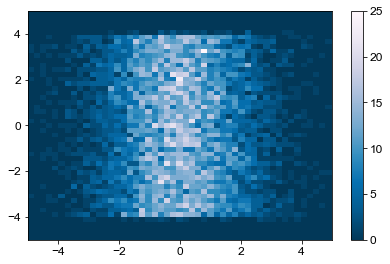

In [15]:
N = 10000
vals = np.c_[ np.random.normal(0,1.5,N), np.random.uniform(-4.0,4.0,N) ]
bins = [ np.linspace(-5,5,50), np.linspace(-5,5,50) ]

hist = Hist2D(vals,bins=bins)

_ = plotter.plot_2d(hist)

Marginal 1D histograms can be drawn as well. Use `do_projection` for projections and `do_profile` for profiles. The matplotlib colorscheme name can also be specified via `cmap`. (Note that putting `_r` at the end of a colorscheme name makes matplotlib reverse the color scale.)

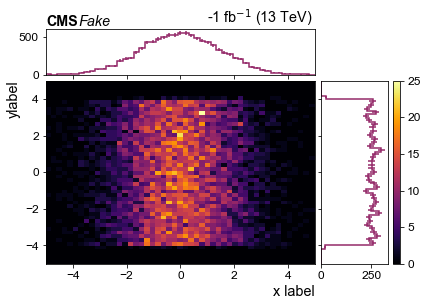

In [16]:
_ = plotter.plot_2d(hist, do_projection=True, xlabel="x label", ylabel="ylabel", cms_type="Fake", cmap="inferno")

Create a histogram of gassian vs flat numbers. Then add to it values in a shifted gaussian vs flat numbers in two smaller ranges. Then plot it, along with profiles. The x profile should still be flat (because things are symmetric around y=0), but the y profile should show two clear peaks.

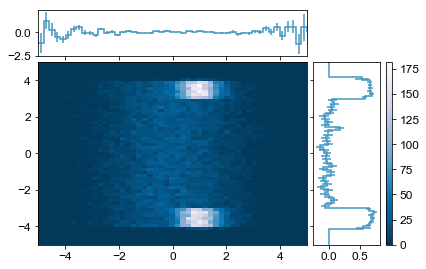

In [21]:
N = 20000
vals = np.c_[ np.random.normal(0,1.5,N), np.random.uniform(-4.0,4.0,N) ]
bins = [ np.linspace(-5,5,25*2), np.linspace(-5,5,30*2) ]
hist = Hist2D(vals,bins=bins)

N = 5000
vals = np.c_[ np.random.normal(1,0.5,N), np.random.uniform(3.0,4.0,N) ]
bins = [ np.linspace(-5,5,25*2), np.linspace(-5,5,30*2) ]
hist += Hist2D(vals,bins=bins)

N = 5000
vals = np.c_[ np.random.normal(1,0.5,N), np.random.uniform(-3.0,-4.0,N) ]
bins = [ np.linspace(-5,5,25*2), np.linspace(-5,5,30*2) ]
hist += Hist2D(vals,bins=bins)

_ = plotter.plot_2d(hist, do_profile=True)